# Regression Analysis

## 1. Import libraries

In [294]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [295]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [308]:
# Define path and load data 
path= r'C:\Users\ale_o\OneDrive\Escritorio\Data Analytics\7. Advanced Analytics and Dashboard Design'

In [309]:
#load data
df = pd.read_csv(os.path.join(path,'Data', 'Original Data', 'cwurData.csv'))

## 2. Data cleaning

In [310]:
df.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

In [311]:
df.head(10)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1000,Harvard University,United States of America,1,367,1,1,1,1,1,NaN,7,100.00,2013
1,999,Harvard University,United States of America,1,367,1,1,1,1,1,1.0,2,100.00,2014
2,999,Harvard University,United States of America,1,367,1,1,1,1,1,1.0,3,100.00,2015
3,960,Rockefeller University,United States of America,15,367,101,16,101,28,96,NaN,101,61.74,2012
4,994,University of Cambridge,United Kingdom,1,367,10,5,10,9,12,13.0,48,97.64,2014
5,993,University of Cambridge,United Kingdom,1,367,10,5,11,6,12,13.0,48,96.81,2015
6,993,Massachusetts Institute of Technology,United States of America,3,367,16,2,16,3,3,NaN,1,91.45,2013
7,991,California Institute of Technology,United States of America,4,367,29,7,37,22,22,NaN,18,85.21,2012
8,995,Massachusetts Institute of Technology,United States of America,3,367,11,2,15,2,2,2.0,1,98.69,2014
9,995,Massachusetts Institute of Technology,United States of America,3,367,11,2,15,2,2,2.0,1,97.54,2015


In [312]:
df.shape

(2200, 14)

In [313]:
# Duplicate values
duplicates = df.duplicated()
duplicates.shape

(2200,)

In [314]:
# Check missing values 
df.isnull().sum()

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

In [315]:
# Drop unnecesary columns 
df_2 =df.drop(columns=  ['broad_impact'])

In [316]:
df_2.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'patents', 'score', 'year'],
      dtype='object')

In [317]:
df_2.shape

(2200, 13)

C:\Users\ale_o\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='score', ylabel='Density'>

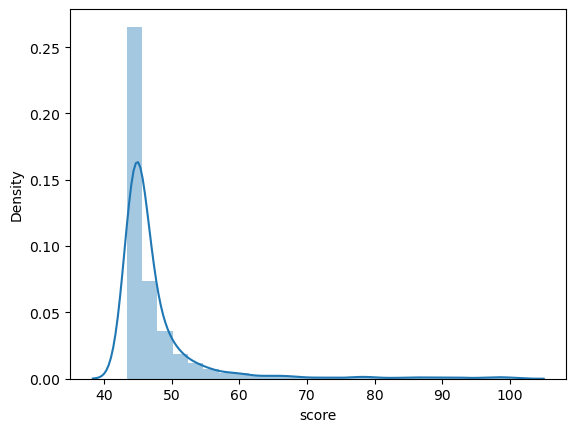

In [318]:
# Extreme values check 
sns.distplot(df_2['score'], bins=25)

In [319]:
# Check the mean 
round(df_2['score'].mean(),3)

47.798

In [320]:
# Check median 
round(df_2['score'].median(),3)

45.1

In [321]:
# Check the max value 
df_2['score'].max()

100.0

In [322]:
# Check min value 
df_2['score'].min()

43.36

## 3. Explore data 

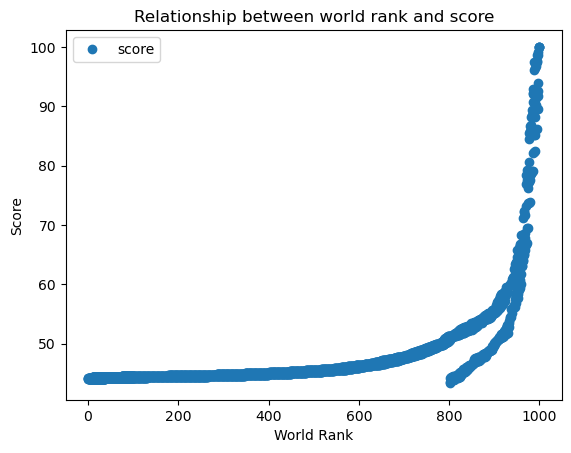

In [323]:
# Create a scatterplot 
# Relationship between rank and score

df.plot(x = 'world_rank', y= 'score', style = 'o')
plt.title ("Relationship between world rank and score")
plt.xlabel('World Rank')
plt.ylabel('Score')
plt.show()

## 4. Define Hypothesis

#### Hypthotesis: the world ranking is linked to the general score of each university. 

## 6. Reshape the variables

In [332]:
# Reshape the variables
X = df['world_rank'].values.reshape(-1,1)
y = df['score'].values.reshape(-1,1)

In [333]:
X

array([[1000],
       [ 999],
       [ 999],
       ...,
       [   2],
       [   1],
       [   1]], dtype=int64)

In [334]:
print(len(X))

2200


In [335]:
y

array([[100.  ],
       [100.  ],
       [100.  ],
       ...,
       [ 44.03],
       [ 44.02],
       [ 44.02]])

In [336]:
print(len(y))

2200


## 7. Split the data into two sets

In [339]:
# Create a training set and a test set
X_train, y_train, X_test, y_test = train_test_split(X,y, test_size =0.5, random_state =0)

In [342]:
# Create a scatterplot 
# Relationship between quality of education and score

#df.plot(x = 'quality_of_education', y= 'score', style = 'o')

#plt.title ("Relationship between quality of education and score")
#plt.xlabel('Quality of education')
#plt.ylabel('Score')
#plt.show()

In [341]:
# Reshape the variables 
#X = df['quality_of_education'].values.reshape(-1,1)
#y = df['score'].values.reshape(-1,1)

## 8. Regression analysis 

In [273]:
# Create a regression object 

regression = LinearRegression()

In [274]:
print(len(X_train))

1100


In [275]:
print(len(y_train))

1100


In [276]:
# Fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [277]:
# Predict the values of y using X 
y_predicted = regression.predict(X_test)

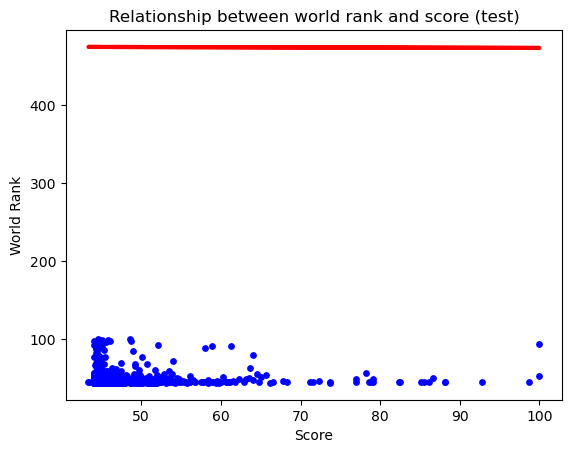

In [284]:
# Create a plot that shows the regression line from the model on the test set 
plot_test = plt 
plot_test.scatter(X_test, y_test, color = 'blue', s= 15)
plot_test.plot(X_test, y_predicted, color = 'red', linewidth =3)
plot_test.title ('Relationship between world rank and score (test)')
plot_test.xlabel('Score')
plot_test.ylabel('World Rank')
plot_test.show()

#### Comments:
As shown in the graph the relationship between the wo variables in the regression model is null. The output modeled is much higher than the real numbers. 

## 10. Model performance statistics

In [285]:
#Create objects that contain the model summary statistics 

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [286]:
# Prin statistical parameters 

print('Slope:', regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.02324626]]
Mean squared error:  181527.16380423552
R2 score:  -2389.3476412916402


#### Comments: 

This statistical parameters let us confirm that the data gotten from the regression model is not reliable. 
For the slope, the model has a negative model which means that as the world rank increases the score decreases. 
For the mean squared error, we can confirm it is pretty big which means that there is a big difference between the data predicted and the real model. 
Finally, the R2 score is very big negative number, whichs is interpreted as a poor fit between the predicted and the actual numbers. 

In [343]:
y_predicted

array([[474.17662959],
       [474.12502291],
       [474.00437484],
       ...,
       [474.1859281 ],
       [474.18569563],
       [474.22265718]])

In [344]:
y_predicted.shape

(1100, 1)

In [345]:
# Compare the actual y and the y predicted 
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(10)

,Actual,Predicted
0,44.59,474.176630
1,44.53,474.125023
2,44.63,474.004375
3,55.67,474.067372
4,50.37,474.227074
5,50.58,474.006235
6,45.53,474.219635
7,43.77,474.226377
8,44.41,474.108053
9,45.43,474.218938


#### Comments: 
This chart let us see what we concluded before, there is a big difference between the actual and the predicted data. 

As followign steps it would be necessary to determine if the dataset is big enough to get to conclusions, there is a big gap between the model ran and the real data, when the output expected is different. 

Overall, with the previous analysis it can be concluded that the hypothesis determined is false. 